# **Object Detection - YOLOR with MS-COCO Dataset**

In [ ]:
# GPU 할당 체크
!nvidia-smi

Wed Feb 15 11:59:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P0    27W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## [Step 01] YOLOR 및 Dependency 설치

In [ ]:
# Clone YOLOR from GitHub
!git clone https://github.com/WongKinYiu/yolor

Cloning into 'yolor'...
remote: Enumerating objects: 492, done.
remote: Total 492 (delta 0), reused 0 (delta 0), pack-reused 492
Receiving objects: 100% (492/492), 3.42 MiB | 7.15 MiB/s, done.
Resolving deltas: 100% (227/227), done.


In [ ]:
# Install YOLOR
%cd yolor
!pip install -qr requirements.txt

/content/yolor
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.8/776.8 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 93.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 59.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.14.1 requires torch==1.13.1, but you have torch 1.7.0 which is incompatible.
torchaudio 0.13.1+cu116 requires torch==1.13.1, but you have torch 1.7.0 which is incompatible.
fastai 2.7.10 requires torchvision>=0.8.2, but you have torchvision 0.8.1 which is incompatible.


In [ ]:
# Install Mish CUDA
!git clone https://github.com/JunnYu/mish-cuda

%cd mish-cuda
!python setup.py build install
%cd ..

Cloning into 'mish-cuda'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 195 (delta 7), reused 79 (delta 3), pack-reused 107
Receiving objects: 100% (195/195), 208.77 KiB | 12.28 MiB/s, done.
Resolving deltas: 100% (56/56), done.
/content/yolor/mish-cuda
/usr/lib/python3.8/distutils/extension.py:131: UserWarning: Unknown Extension options: 'headers'
  warnings.warn(msg)
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.8
creating build/lib.linux-x86_64-3.8/mish_cuda
copying src/mish_cuda/__init__.py -> build/lib.linux-x86_64-3.8/mish_cuda
running egg_info
creating src/mish_cuda.egg-info
writing src/mish_cuda.egg-info/PKG-INFO
writing dependency_links to src/mish_cuda.egg-info/dependency_links.txt
writing requirements to src/mish_cuda.egg-info/requires.txt
writing top-level names to src/mish_cuda.egg-info/top_level.txt
writing manifest file 'src/mish_cuda

In [ ]:
# Install PyTorch Wavelets
!git clone https://github.com/fbcotter/pytorch_wavelets

%cd pytorch_wavelets
!pip install .
%cd ..

Cloning into 'pytorch_wavelets'...
remote: Enumerating objects: 978, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 978 (delta 79), reused 91 (delta 46), pack-reused 836
Receiving objects: 100% (978/978), 6.80 MiB | 18.67 MiB/s, done.
Resolving deltas: 100% (663/663), done.
/content/yolor/pytorch_wavelets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/yolor/pytorch_wavelets
  Preparing metadata (setup.py) ... done
  Created wheel for pytorch-wavelets: filename=pytorch_wavelets-1.3.0-py3-none-any.whl size=54869 sha256=a7ed2ffa1b28aea4241d6362a7ef027ff338e35abb81a39568c76b1f30d33f00
  Stored in directory: /tmp/pip-ephem-wheel-cache-xm7l0_zj/wheels/57/57/4a/ad51c2e829a26eb7485c0be927137876937f8862cdd4cf1964
Successfully built pytorch-wavelets
/content/yolor


## [Step 02] 데이터세트 다운로드

In [ ]:
!wget -O dataset.zip https://www.dropbox.com/s/0v2ry2jbqaes64o/dataset.zip?dl=1
!unzip dataset.zip -d dataset

## [Step 03] Weight 다운로드

In [ ]:
# YOLOR-P6, W6, E6, D6
!wget -O yolor_p6.pt https://www.dropbox.com/s/ldyk3dzuuu3y9xx/yolor_p6.pt?dl=1
#!wget -O yolor_w6.pt https://www.dropbox.com/s/cqrxp1tlfk7sb51/yolor_w6.pt?dl=1
#!wget -O yolor_d6.pt https://www.dropbox.com/s/znl5pfwcyr8ylcb/yolor-d6.pt?dl=1
#!wget -O yolor_e6.py https://www.dropbox.com/s/ql8e89jwi6wewbc/yolor-e6.pt?dl=1

--2023-02-15 12:16:00--  https://www.dropbox.com/s/ldyk3dzuuu3y9xx/yolor_p6.pt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/ldyk3dzuuu3y9xx/yolor_p6.pt [following]
--2023-02-15 12:16:01--  https://www.dropbox.com/s/dl/ldyk3dzuuu3y9xx/yolor_p6.pt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc84f881fd3a1fe8e48e54e3ec55.dl.dropboxusercontent.com/cd/0/get/B2iyyOScN8LS96u-Q6uw2u4fiM-uDZE7nR1xj7iNUfc1a7gPimhiykg7W4o8t1HFJiOsDEt-Aj9fCYZYRIGEoXRAWqFBhZKVyptrI9Bb15h0q2QLZHCwC4-1uLMjh2tU5sKP7RIa-2lHtG0RcaXZ4k4Zgg8mdtHhTA78_mE4wxZCVw/file?dl=1# [following]
--2023-02-15 12:16:01--  https://uc84f881fd3a1fe8e48e54e3ec55.dl.dropboxusercontent.com/cd/0/get/B2iyyOScN8LS96u-Q6uw2u4fiM-uDZE7nR1xj7iNUfc1a7gPimhiykg7W4o8t1HFJiOsDEt-Aj9fCY

## [Step 04] YOLOR 이미지 추론

In [ ]:
in_path = "dataset/images/"
out_path = "dataset/images_out/"

# Inference using YOLOR
!python detect.py --source $in_path \
                --output $out_path \
                --cfg cfg/yolor_p6.cfg \
                --weights yolor_p6.pt \
                --names data/coco.names \
                --conf 0.5 \
                --img-size 1280 \
                --device 0

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolor_p6.cfg', classes=None, conf_thres=0.5, device='0', img_size=1280, iou_thres=0.5, names='data/coco.names', output='dataset/images_out/', save_txt=False, source='dataset/images/', update=False, view_img=False, weights=['yolor_p6.pt'])
image 1/4 /content/yolor/dataset/images/test_01.jpg: 896x1280 7 persons, Done. (0.057s)
image 2/4 /content/yolor/dataset/images/test_02.jpg: 1280x960 3 persons, 1 bicycles, 1 buss, Done. (0.048s)
image 3/4 /content/yolor/dataset/images/test_03.jpg: 896x1280 16 cars, 2 benchs, Done. (0.045s)
image 4/4 /content/yolor/dataset/images/test_04.jpg: 768x1280 2 persons, 1 ties, Done. (0.041s)
Results saved to dataset/images_out
Done. (0.436s)


Matplotlib을 활용한 추론된 이미지 불러오기

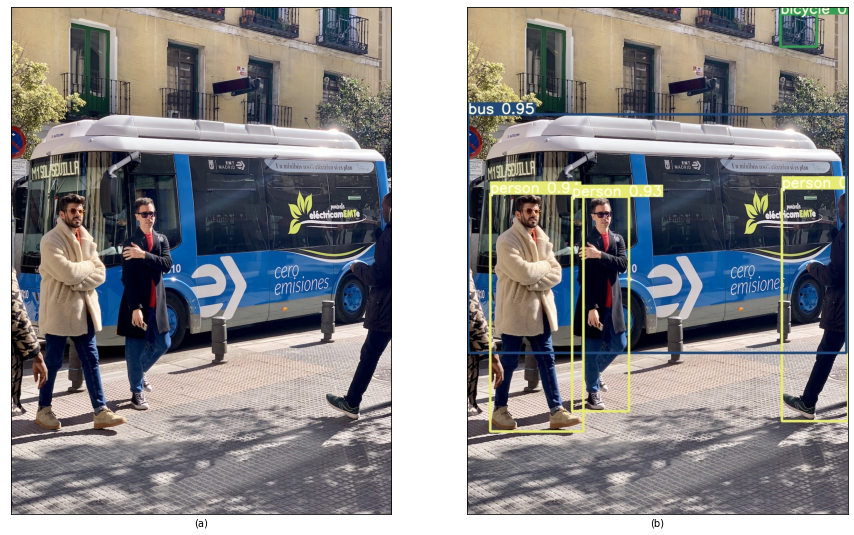

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os.path

filename = 'test_02.jpg'
fig = plt.figure(figsize=(15,10))
rows = 1; cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(cv2.cvtColor(cv2.imread(os.path.join(in_path, filename)), cv2.COLOR_BGR2RGB))
ax1.set_xlabel('(a)')
ax1.set_xticks([]), ax1.set_yticks([])

ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(cv2.cvtColor(cv2.imread(os.path.join(out_path, filename)), cv2.COLOR_BGR2RGB))
ax2.set_xlabel('(b)')
ax2.set_xticks([]), ax2.set_yticks([])

plt.show()

## [Step 05] YOLOR 비디오 추론

In [ ]:
in_path = "dataset/videos/"
out_path = "dataset/videos_out/"

# Inference using YOLOR
!python detect.py --source $in_path \
                --output $out_path \
                --cfg cfg/yolor_p6.cfg \
                --weights yolor_p6.pt \
                --names data/coco.names \
                --conf 0.5 \
                --img-size 1280 \
                --device 0

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolor_p6.cfg', classes=None, conf_thres=0.5, device='0', img_size=1280, iou_thres=0.5, names='data/coco.names', output='dataset/videos_out/', save_txt=False, source='dataset/videos/', update=False, view_img=False, weights=['yolor_p6.pt'])
video 1/3 (1/249) /content/yolor/dataset/videos/test_01.mp4: 768x1280 1 persons, 2 cars, Done. (0.053s)
video 1/3 (2/249) /content/yolor/dataset/videos/test_01.mp4: 768x1280 1 persons, 2 cars, Done. (0.049s)
video 1/3 (3/249) /content/yolor/dataset/videos/test_01.mp4: 768x1280 1 persons, 2 cars, Done. (0.044s)
video 1/3 (4/249) /content/yolor/dataset/videos/test_01.mp4: 768x1280 1 persons, 2 cars, Done. (0.041s)
video 1/3 (5/249) /content/yolor/dataset/videos/test_01.mp4: 768x1280 1 persons, 2 cars, Done. (0.048s)
video 1/3 (6/249) /content/yolor/dataset/videos/test_01.mp4: 768x1280 1 persons, 3 cars, Done. (0.043s)
video 1/3 (7/249) /content/yolor/dataset/videos/test_01.mp4: 768x1280 1 persons, 5 

Display Video Output

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = "dataset/videos_out/test_02.mp4"  #Get your video here

# Compressed video path
compressed_path = "dataset/videos_out/test_02_comp.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=1000 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.